**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

In [1]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports

In [2]:
from platform import python_version
print(python_version())

3.9.4


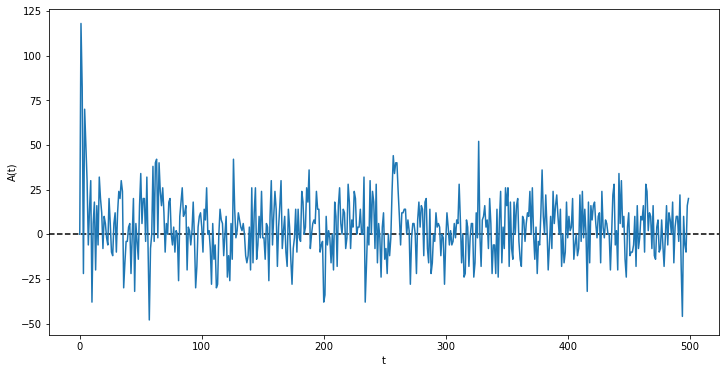

In [2]:
# Use anything from lib package
# E.g.
from lib.functions import simulate_simple_game
e = 9
simulate_simple_game()

In [4]:
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot


In [ ]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        0.3: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.5: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy, AlwaysOneStrategy],
                strategy_update_rate=0.8
            ),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.2: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m=2)
        ),
    }
).simulate_game()

default_plot(times, attendances)

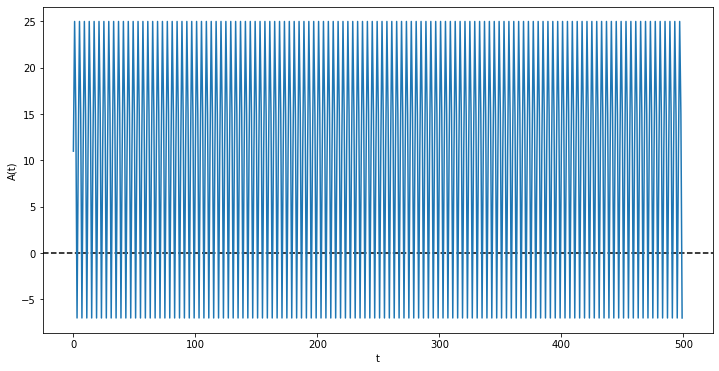

In [4]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
    }
).simulate_game()

default_plot(times, attendances)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma
import seaborn as sns

In [50]:
class BaseMemoryGenerator:
    """
    Abstract class that should be subclassed when implementing
    a new memory generator.
    """
    def __init__(self, m = 3, n_agents = 201, min_m = 1, max_m = 20, a = 4):
        self.m = m
        self.n_agents = n_agents

    def generate(self, size):
        raise NotImplementedError

In [51]:
class NormalDistributionMemoryGenerator(BaseMemoryGenerator):
    """
    Samples memory from a distribution
    (Memories are distributed by normal distribution.)
    """

    def generate(self, n_agents, min_m = 1, max_m = 20):
        spaces = max_m-min_m+1
        x = np.linspace(min_m, max_m, spaces)
        mean = np.mean(x)
        sd = np.std(x)
        y =  norm.pdf(x, mean, sd)
        sample = np.random.choice(x, n_agents, p=y/(sum(y))).astype(int)
        return sample

In [52]:
class GaussianDistributionMemoryGenerator(BaseMemoryGenerator):
    """
    Samples memory from a distribution
    (Memories are distributed by default gaussian distribution.)
    """

    def generate(self, n_agents, min_m = 1, max_m = 20, a = 4):
        spaces = max_m-min_m+1
        x = np.linspace(min_m, max_m, spaces)
        y =  gamma.pdf(x, a)
        sample = np.random.choice(x, n_agents, p=y/(sum(y))).astype(int)
        return sample

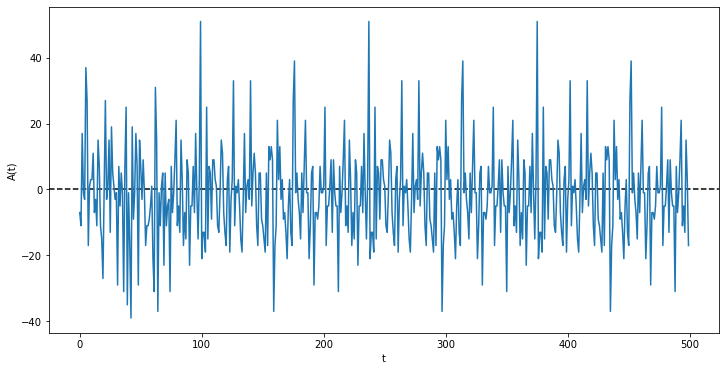

In [53]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=NormalDistributionMemoryGenerator(n_agents = 201)
        ),
    }
).simulate_game()

default_plot(times, attendances)

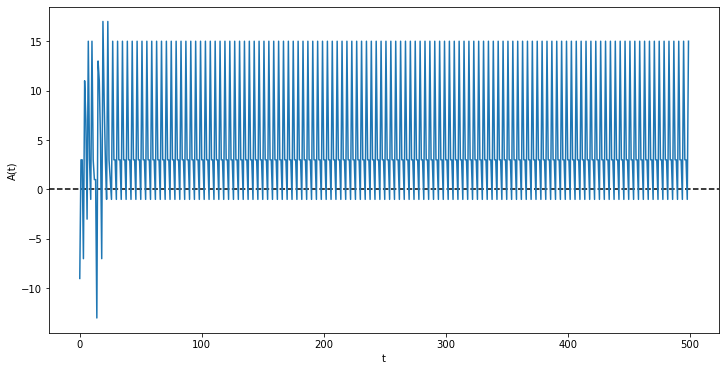

In [82]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=GaussianDistributionMemoryGenerator(n_agents = 201)
        ),
    }
).simulate_game()

default_plot(times, attendances)

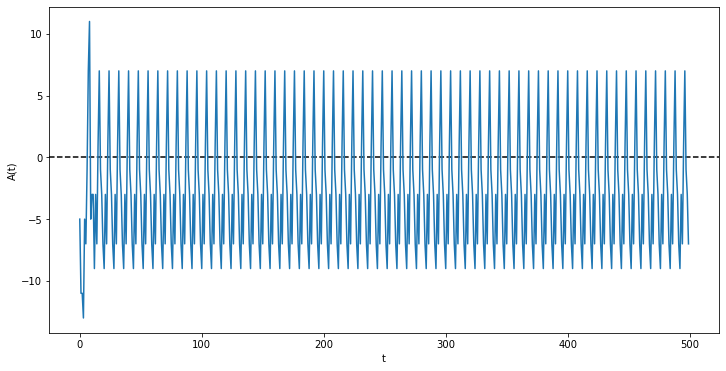

In [81]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=GaussianDistributionMemoryGenerator(n_agents = 201, min_m = 1, max_m = 20)
        ),
    }
).simulate_game()

default_plot(times, attendances)

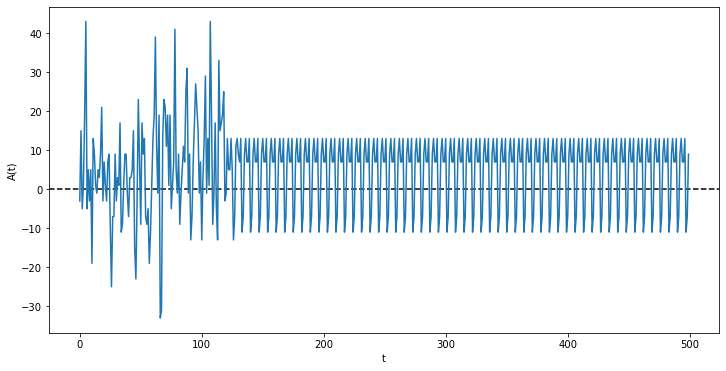

In [78]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=NormalDistributionMemoryGenerator(n_agents = 201, min_m = 1, max_m = 20)
        ),
    }
).simulate_game()

default_plot(times, attendances)

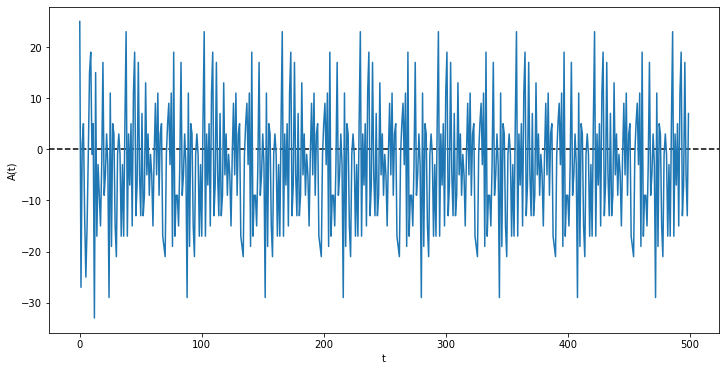

In [22]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=GaussianDistributionMemoryGenerator(n_agents = 201, min_m = 10, max_m = 20)
        ),
    }
).simulate_game()

default_plot(times, attendances)

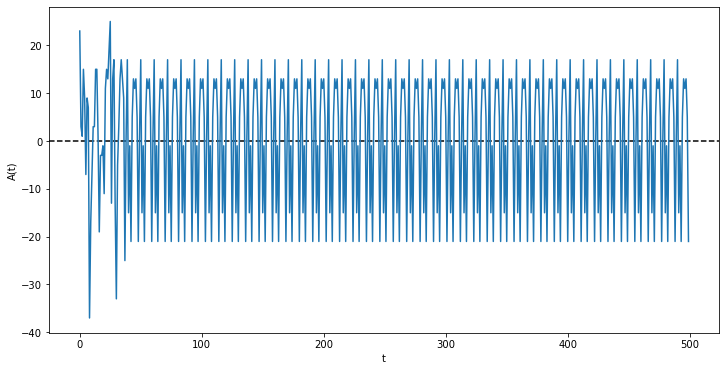

In [79]:
times, attendances, _, _ = MinorityGame(
    n_agents=201,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy]),
            memory_generator=NormalDistributionMemoryGenerator(n_agents = 201, min_m = 10, max_m = 20)
        ),
    }
).simulate_game()

default_plot(times, attendances)

## Plotting the histogram of normal distribution

In [71]:
n_agents = 201
min_m = 1
max_m = 20
spaces = max_m-min_m+1
x = np.linspace(min_m, max_m, spaces)
mean = np.mean(x)
sd = np.std(x)
y =  norm.pdf(x, mean, sd)

sample = np.random.choice(x, n_agents, p=y/(sum(y))).astype(int)
sample

array([12,  9, 10, 11,  8,  3,  7, 17, 17,  3,  7, 15, 13,  5,  6, 11, 12,
        8, 19, 14,  9,  7, 11,  5, 10, 10, 11,  6, 15, 14, 16,  6,  3, 19,
        7, 14, 13, 11, 14,  2,  9, 16,  8, 11,  7, 12,  4,  3, 11, 12,  4,
       19,  7, 16, 12,  8,  6, 11, 11, 13, 13, 15, 14,  3, 18,  8, 15, 11,
       10, 19, 15, 10,  5,  9, 11,  8,  9, 11, 20, 19, 12,  3, 19,  8,  5,
       11,  8, 12, 12,  5, 15, 10, 12, 12, 10,  3,  6,  6, 17, 17, 12,  4,
        9,  4,  4,  8, 11,  9, 12,  4,  4, 10, 13, 14,  7,  8, 12,  2, 11,
       15, 15,  3,  9, 17, 13, 20,  9,  7, 13,  8,  5,  8,  2,  7, 10,  2,
        8,  9, 13, 19, 14,  7,  8,  6, 17, 14,  4, 10,  9,  9,  7, 12, 12,
       10,  7, 11,  6,  8, 11,  4,  7,  9, 10, 13,  8, 19, 14,  7, 15, 10,
       11,  8,  4, 16, 15, 11,  4, 20, 10, 10, 14, 12, 13, 10, 16, 13,  9,
        9, 10, 12, 14, 13, 13, 11, 12, 12,  9,  1, 14,  6,  8])

C:\Users\Reetta\Anaconda3\envs\abm-project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


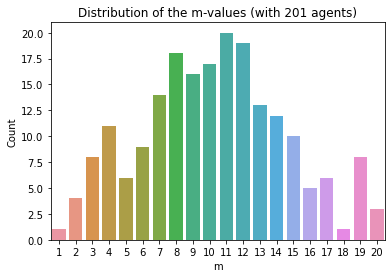

In [72]:
# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)

# Plot the results
sns.barplot(side, count)
plt.title(
    f"Distribution of the m-values (with {n_agents} agents)")
plt.ylabel("Count")
plt.xlabel("m")
plt.show()

## Plotting a histogram of gaussian distribution

In [73]:
n_agents = 201
a = 4
min_m = 1
max_m = 20
spaces = max_m-min_m
x = np.linspace(min_m, max_m, spaces)
y =  gamma.pdf(x, a)

sample = np.random.choice(x, n_agents, p=y/(sum(y))).astype(int)
sample

array([ 7,  5,  5,  5,  8,  7,  4,  4,  3,  3,  7,  4,  2,  5,  5,  5, 11,
        4,  3,  4,  4,  4,  6,  4,  6,  3,  1,  3,  4,  3,  8,  2,  6,  4,
        4,  6,  4,  2,  9,  4,  5,  3,  2,  2,  2,  2,  1,  4,  5,  4,  1,
        6,  4,  3,  4,  3,  4,  7,  7,  6,  5,  2,  6,  9,  4,  4,  4,  4,
        2,  6,  3,  7,  3,  8,  2,  1,  5,  8,  6,  1,  3,  3,  2,  5,  5,
        9,  3,  3,  3,  4,  3,  5,  1,  6,  1,  5,  4,  2,  4,  2,  2,  7,
        3,  3,  3,  4,  2,  3,  2,  3,  5,  2,  2,  2,  6,  2,  3,  3,  3,
        8,  9,  7,  7,  1,  5,  2,  4,  5,  2,  3,  4,  4,  4,  3,  2,  2,
        5,  2,  5,  4,  4,  5,  3,  7,  3,  3,  3,  3,  1,  4,  2,  5,  5,
        3,  2,  5,  5,  3,  5,  2,  5,  3,  7,  3,  2,  9,  1,  2,  4,  2,
        2,  2,  3,  5,  6,  2,  4,  3,  4,  5,  4,  6,  4,  7,  3,  7,  2,
        3,  3,  4,  5,  1,  4,  3,  2,  6,  8,  1,  3,  5,  2])

C:\Users\Reetta\Anaconda3\envs\abm-project\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


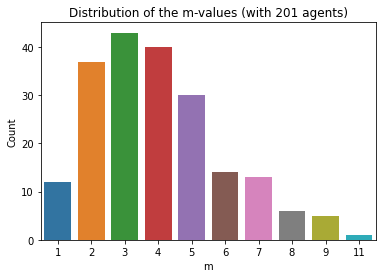

In [74]:
# Numpy arrays containing counts for each side
side, count = np.unique(sample, return_counts=True)

# Plot the results
sns.barplot(side, count)
plt.title(
    f"Distribution of the m-values (with {n_agents} agents)")
plt.ylabel("Count")
plt.xlabel("m")
plt.show()

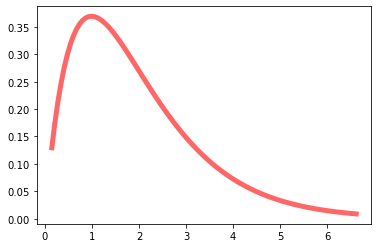

In [61]:
fig, ax = plt.subplots(1, 1)
a = 1.99
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')